# Imports

In [19]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import random
import pandas as pd

# Récupérer les données

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples

Image example : 


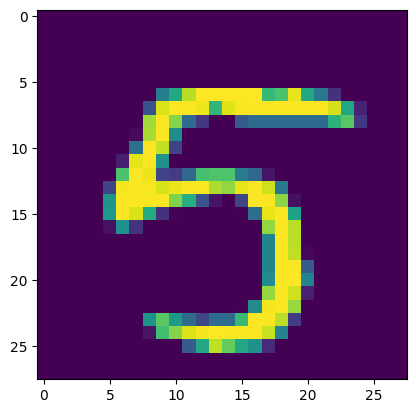

In [20]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(image_train, label_train), (image_test, label_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = image_train.astype("float32") / 255
x_test = image_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(image_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

print("\nImage example : ")
image_index = random.randint(0,x_train.shape[0])
plt.imshow(x_train[image_index])
plt.show()

Les images du dataset sont en fait des matrices de 28x28 qui contiennent donc 255 données. Chaque données sont un chiffre de 0 a 9.
On les normalise ensuite avec la fonction "normalize" qui est utile pour normaliser les données entre 0 et 1
De plus on utilisers l'encodage one-hot pour nos labels.
Le label [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] nous indique que notre digit est un 8.

On normalise les données d'entrainement et on transforme les labels en vecteur de taille 10.

In [21]:
x_train = keras.utils.normalize(x_train,axis=1)
x_test = keras.utils.normalize(x_test,axis=1)

#Passage en one-hot
y_train = keras.utils.to_categorical(label_train)
y_test = keras.utils.to_categorical(label_test)

On peut afficher au hasard une image du dataset d'entrainement avec son label pour observer le résultat.

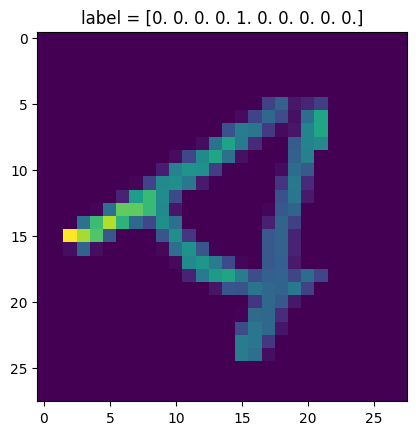

In [22]:
index = random.randint(0,len(x_train))
plt.imshow(x_train[index])
plt.title("label = " + str(y_train[index]))
plt.show()

# Fonctions utilitaires
Nous créons quelques fonctions qui nous serons utiles plus tard :
- une pour afficher la performance du model en fonction du nombre d'epoch
- un pour entrainer le model

In [23]:
def createGraph(history,num_of_layer):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Gaph of the model accuracy with ' + str(num_of_layer) + ' layers')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train data', 'validation data'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Gaph of the model loss with ' + str(num_of_layer) + ' layers')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train data', 'validation data'], loc='upper right')
    plt.show()

In [24]:
def modelTraining(model,train_data,train_label,validation_data,validation_labels,epochs=3,batch_size=32):
    model.summary()
    history = model.fit(train_data,train_label,epochs=epochs,batch_size=batch_size,validation_data=(validation_data,validation_labels))
    createGraph(history,len(model.layers)-1)

# Model avec 0 couche cachée
On commence pour tester le model de base un model sans "hidden layers". La couche de sortie sera toujours de 10 car il y a 10 chiffres possibles.

Vu que les données d'entrées sont des matrice de 28x28 on doit les reduire en un vector, qui sera de taille 784. On utilise pour cela "layers.flatten"

In [25]:
model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6011 - accuracy: 0.8610 - val_loss: 0.3610 - val_accuracy: 0.9047
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3429 - accuracy: 0.9041 - val_loss: 0.3125 - val_accuracy: 0.9134
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3089 - accuracy: 0.9130 - val_loss: 0.2956 - val_accu

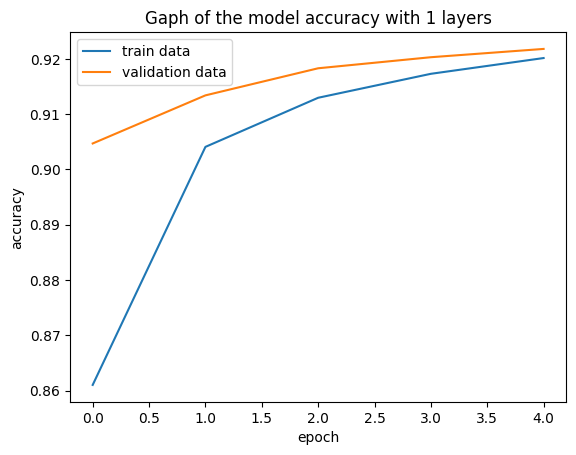

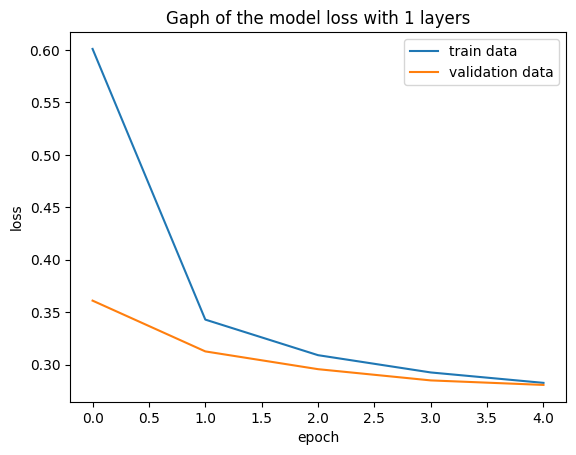

In [26]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

modelTraining(model,x_train, y_train,x_test,y_test,5)

# Model avec 1 couche cachée


In [9]:
model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3158 - accuracy: 0.9122 - val_loss: 0.1750 - val_accuracy: 0.9482
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1432 - accuracy: 0.9577 - val_loss: 0.1258 - val_accuracy:

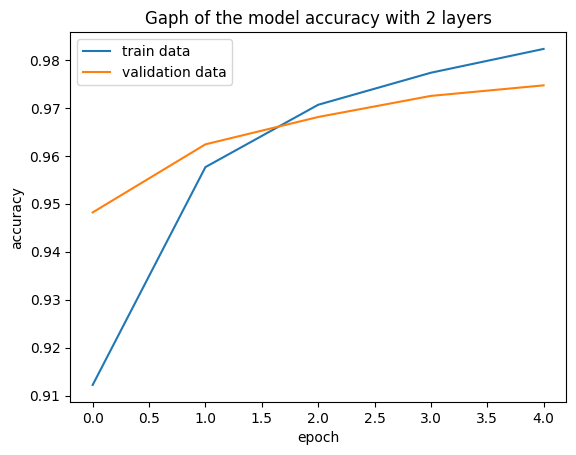

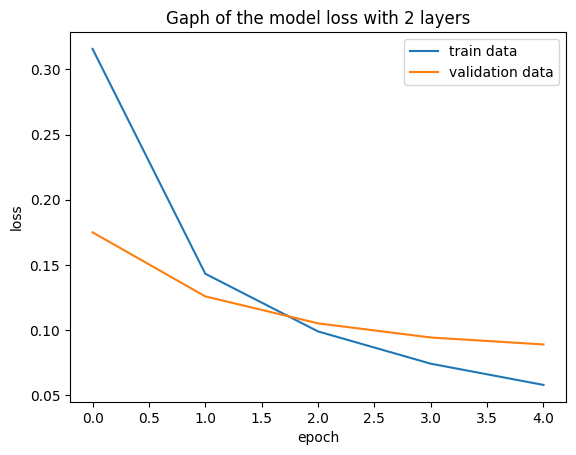

In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

modelTraining(model,x_train, y_train,x_test,y_test,5)

# Model avec 2 couches cachées

In [11]:
model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2615 - accuracy: 0.9246 - val_loss: 0.1349 - val_accuracy: 0.9594
Epo

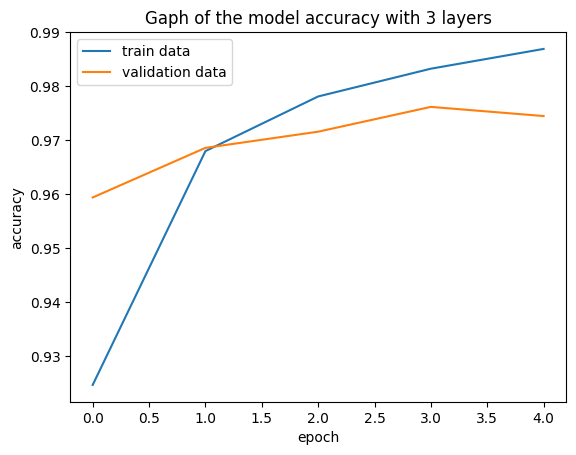

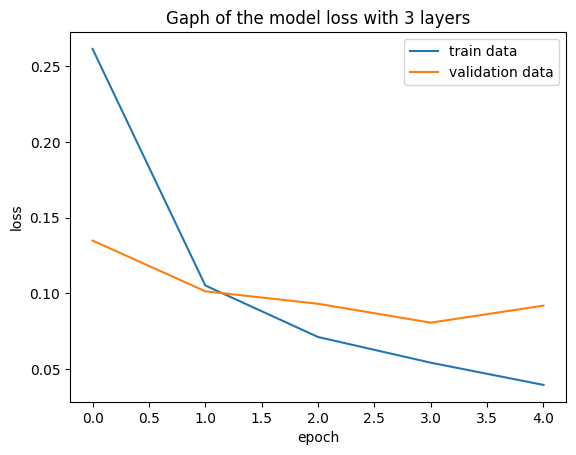

In [12]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

modelTraining(model,x_train, y_train,x_test,y_test,5)

# Model avec 3 couches cachées

In [13]:
model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 134794 (526.54 KB)
Trainable params: 134794 (526.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
1875

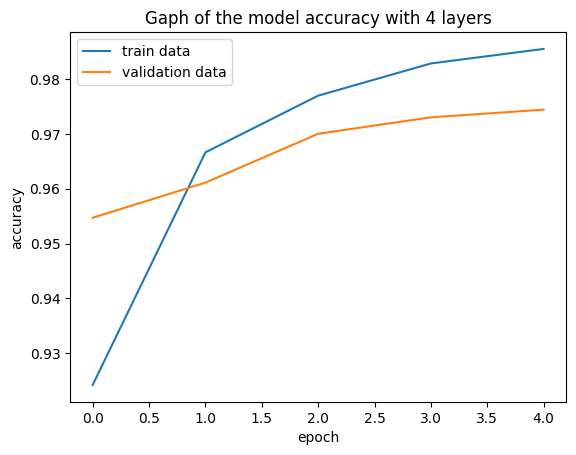

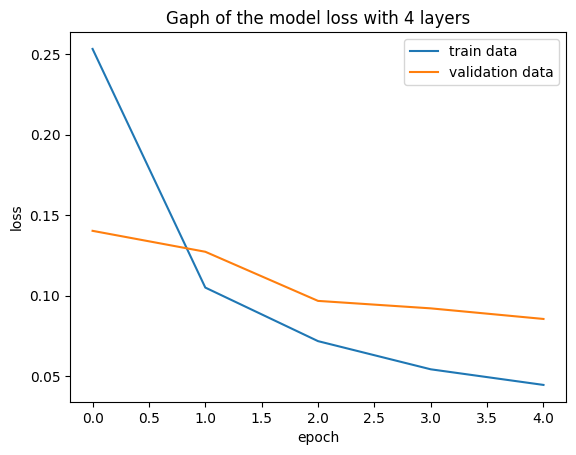

In [14]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

modelTraining(model,x_train, y_train,x_test,y_test,5)

# Model avec 3 couches cachées

In [15]:
model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               100480    
                                                                 
 dense_11 (Dense)            (None, 128)               16512     
                                                                 
 dense_12 (Dense)            (None, 128)               16512     
                                                                 
 dense_13 (Dense)            (None, 10)                1290      
                                                                 
Total params: 134794 (526.54 KB)
Trainable params: 134794 (526.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
1875

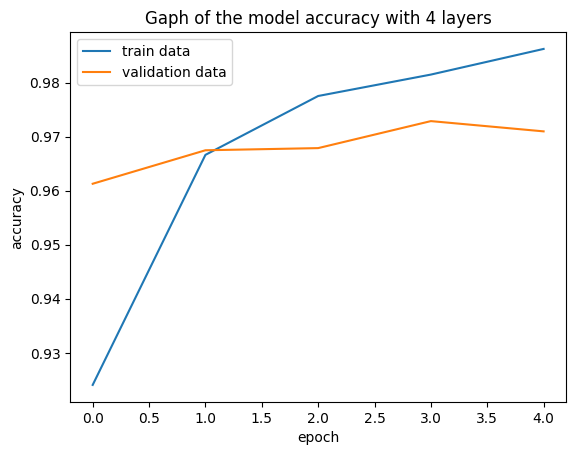

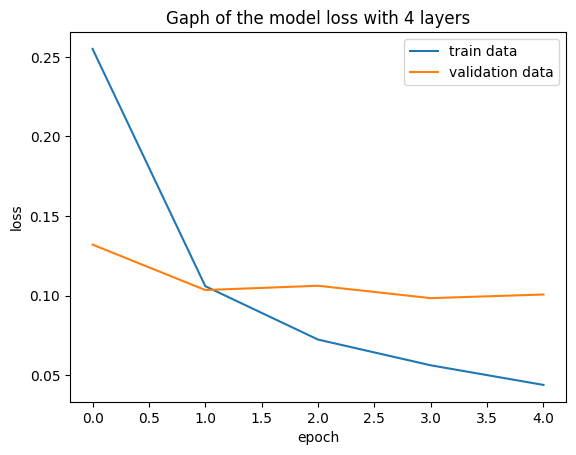

In [16]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

modelTraining(model,x_train, y_train,x_test,y_test,5)

In [29]:
prediction = model.predict(image_test)
print(pd.crosstab(label_test,prediction.argmax(axis=1),colnames=["Prédiction"], margins=True))

313/313 [==============================] - 1s 2ms/step
Prédiction     0     1    2     3    4    5    6    7     8     9    All
row_0                                                                   
0            961     0    0     2    0    0    6    2     9     0    980
1              0  1096    1     3    1    0    2    1    31     0   1135
2              9    32  836    25   13    0   15    7    86     9   1032
3              4     2   10   915    1    9    5    4    49    11   1010
4              1    13    0     1  848    0   14    1    30    74    982
5             15    16    3    59    9  545   19    8   207    11    892
6             12     4    6     3   10    3  902    0    18     0    958
7              3    29   15    15    7    0    0  898     7    54   1028
8              5    11    3    18    5    3    6    3   916     4    974
9              8    14    2    14   17    0    0    6    27   921   1009
All         1018  1217  876  1055  911  560  969  930  1380  1084  10

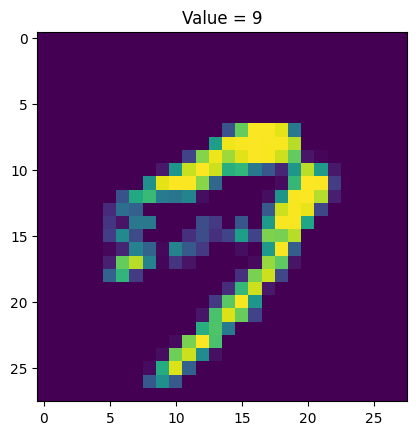

La valeur de prédiction est : 7
La liste des probabilitées est la suivante :
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [32]:
pred = pd.DataFrame({"true_val" : label_test, "pred_val" : prediction.argmax(axis=1)})
false_pred = pred[pred["true_val"] != pred["pred_val"]]
false_num = random.choice(false_pred.index)
plt.imshow(image_test[false_num])
plt.title("Value = " + str(label_test[false_num]))
plt.show()
print("La valeur de prédiction est : " + str(prediction[false_num].argmax()))
print("La liste des probabilitées est la suivante :")
print(np.round(prediction[false_num],3))

# Model avec 1 couche de convolution

In [43]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        # keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        # keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(), # flatten the output
        keras.layers.Dropout(0.5), # prevent from overfitting
        keras.layers.Dense(num_classes, activation="softmax"), # output layer
    ]
)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 5408)              0         
                                                                 
 dropout_4 (Dropout)         (None, 5408)              0         
                                                                 
 dense_20 (Dense)            (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54410 (212.54 KB)
Non-trainable params: 0 (0.00 Byte)
_______________

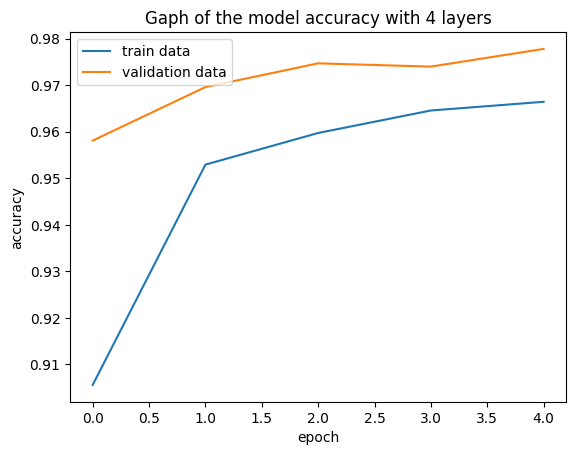

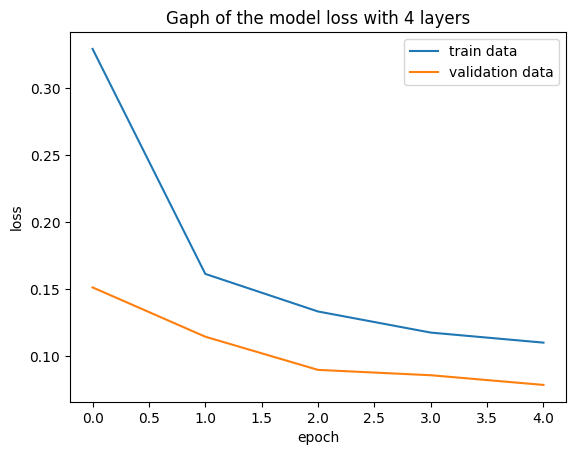

In [44]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

modelTraining(model,x_train, y_train,x_test,y_test,5)